In [18]:
import oommfc
oommfc.oommf.status()

Running OOMMF (TclOOMMFRunner) [2020/04/06 17:45]... (1.4 s)
OOMMF found and running.


0

In [231]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm

In [232]:
import numpy as np

lx = 20e-9
ly = 500e-9  # x and y dimensions of the sample(m)
lz = 10e-9  # sample thickness (m)
dx = dy = dz = 5e-9  # discretisation in x, y, and z directions (m)

Ms = 8e5  # saturation magnetisation (A/m)
A = 1.3e-11  # exchange energy constant (J/m)
H = 8e4 * np.array([1, 0.715, 0.0])
alpha = 0.008  # Gilbert damping
gamma0 = 2.211e5

In [233]:
mesh = df.Mesh(p1=(0, 0, 0), p2=(lx, ly, lz), cell=(dx, dy, dz), pbc=('x'))

system = mm.System(name='stdprobfmr')

system.energy = mm.Exchange(A=A) + mm.Demag() + mm.Zeeman(H=H)
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms)

In [235]:
md = oc.MinDriver()
md.drive(system)

Running OOMMF (TclOOMMFRunner) [2020/04/07 09:47]... (1.4 s)


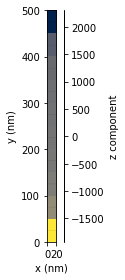

In [236]:
%matplotlib inline
system.m.plane('z', n=(10, 10)).mpl()

In [237]:
# Change external magnetic field.
H = 8e4 * np.array([1, 0.7, 0.0])
system.energy.zeeman.H = H

In [238]:
T = 20e-9
n = 4000

td = oc.TimeDriver()
td.drive(system, t=T, n=n)

Running OOMMF (TclOOMMFRunner) [2020/04/07 09:47]... (165.0 s)


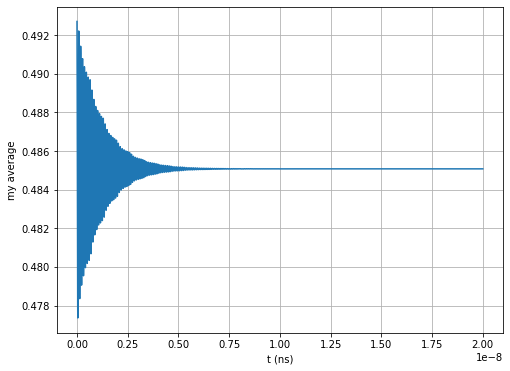

In [239]:
import matplotlib.pyplot as plt

t = system.table['t'].values
mxs = system.table['mx'].values
mys = system.table['my'].values
mzs = system.table['mz'].values

mx = system.table['mx'].values
my = system.table['my'].values
mz = system.table['mz'].values
# Plot <my> time evolution.
plt.figure(figsize=(8, 6))
plt.plot(t, my)
plt.xlabel('t (ns)')
plt.ylabel('my average')
plt.grid()

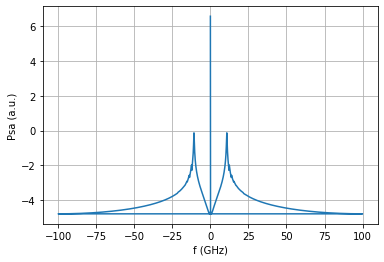

In [240]:
import scipy.fftpack

psd = np.log10(np.abs(scipy.fftpack.fft(my))**2)
f_axis = scipy.fftpack.fftfreq(4000, d=20e-9/4000)

plt.plot(f_axis/1e9, psd)
#plt.xlim([0, 25])
#plt.ylim([-4, 0])
plt.xlabel('f (GHz)')
plt.ylabel('Psa (a.u.)')
plt.grid()

Text(0, 0.5, 'Psa (a.u.)')

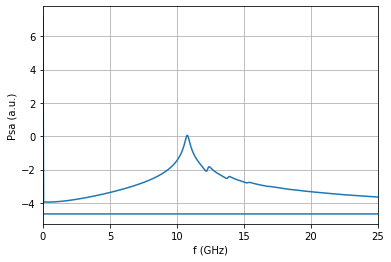

In [241]:
import scipy.fftpack
psd = np.log10(np.abs(scipy.fftpack.fft(mxs))**2 + \
               np.abs(scipy.fftpack.fft(mys))**2 + \
               np.abs(scipy.fftpack.fft(mzs))**2)
f_axis = scipy.fftpack.fftfreq(4000, d=20e-9/4000)

plt.plot(f_axis/1e9, psd)
plt.xlim([0, 25])
#plt.ylim([-6, -5.5])
plt.grid()
plt.xlabel('f (GHz)')
plt.ylabel('Psa (a.u.)')

In [228]:
mxs.shape

(4000,)